## Import required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pip install bar_chart_race


   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   -------------------- ------------------ 81.9/156.8 kB 762.6 kB/s eta 0:00:01
   -------------------------------------  153.6/156.8 kB 833.5 kB/s eta 0:00:01
   -------------------------------------- 156.8/156.8 kB 779.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px
import bar_chart_race as bcr

## Load Dataset

In [4]:
df = pd.read_csv(r"C:\Users\Bhaskar Matta\Downloads\dataset.csv")

df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [5]:
df.shape

(112634, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [7]:
pd.to_datetime(df['Model Year'], format='%Y')

0        2022-01-01
1        2013-01-01
2        2011-01-01
3        2017-01-01
4        2019-01-01
            ...    
112629   2022-01-01
112630   2019-01-01
112631   2022-01-01
112632   2018-01-01
112633   2022-01-01
Name: Model Year, Length: 112634, dtype: datetime64[ns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

## Checking Duplicate Values

In [9]:
df.duplicated().sum()

0

## Checking Missing Values

In [10]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

### Handling Missing Values

In [11]:
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].median())
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])

In [12]:
df.describe() 

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112634.000000    1.126340e+05       1.126340e+05  
mean              29.816254    1.994567e+08       5.296650e+10  
std               14.683387    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

## Data Analysing Part


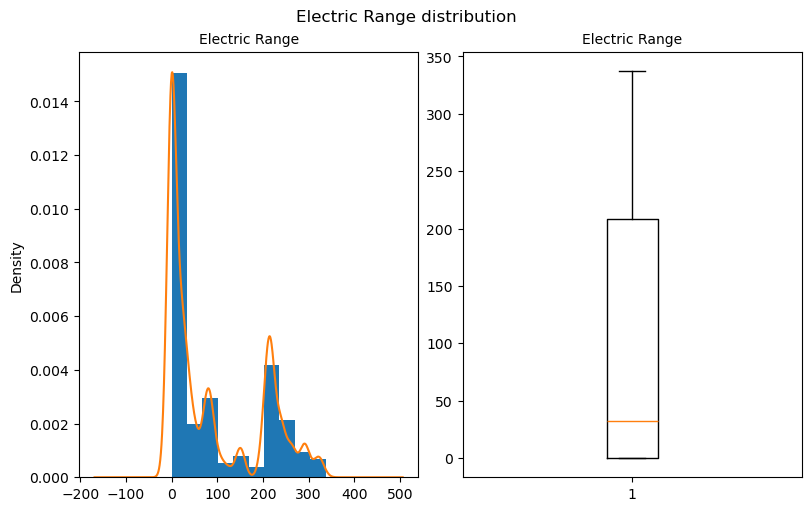

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Electric Range distribution")

axs[0].hist(df['Electric Range'], density=True)
df['Electric Range'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("Electric Range", fontsize="medium")

axs[1].boxplot(df['Electric Range'])
axs[1].set_title("Electric Range", fontsize="medium")

plt.show()

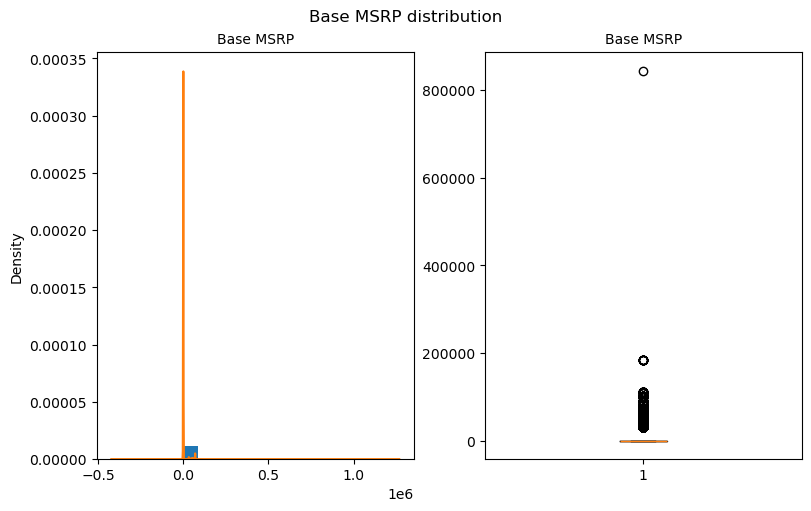

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Base MSRP distribution")

axs[0].hist(df['Base MSRP'], density=True)
df['Base MSRP'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("Base MSRP", fontsize="medium")

axs[1].boxplot(df['Base MSRP'])
axs[1].set_title("Base MSRP", fontsize="medium")

plt.show()

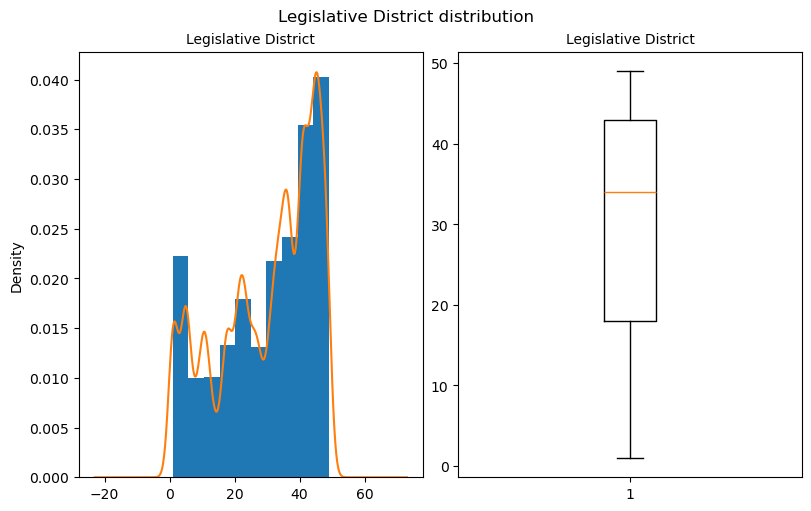

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Legislative District distribution")

axs[0].hist(df['Legislative District'], density=True)
df['Legislative District'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("Legislative District", fontsize="medium")

axs[1].boxplot(df['Legislative District'])
axs[1].set_title("Legislative District", fontsize="medium")

plt.show()

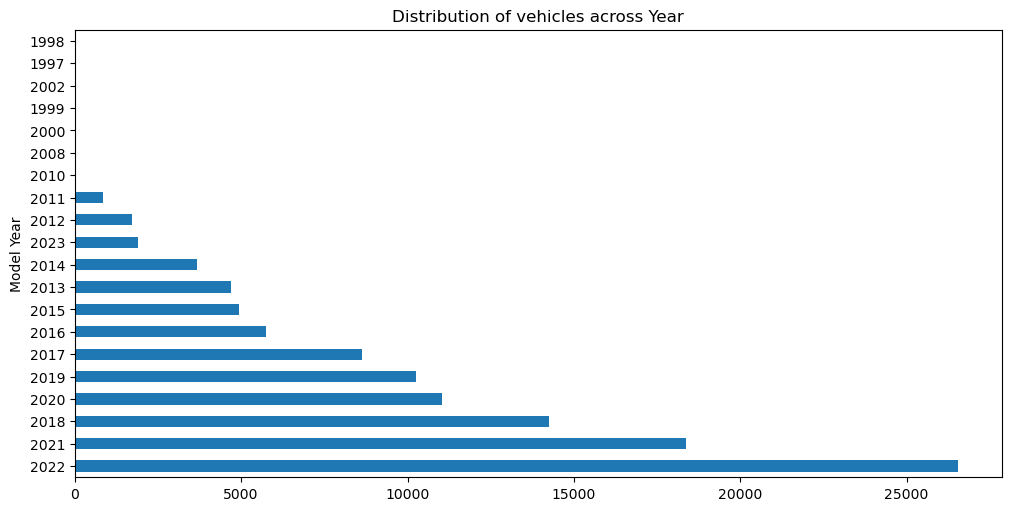

In [16]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Model Year'].value_counts().plot(kind='barh')
plt.title("Distribution of vehicles across Year")
plt.show() 

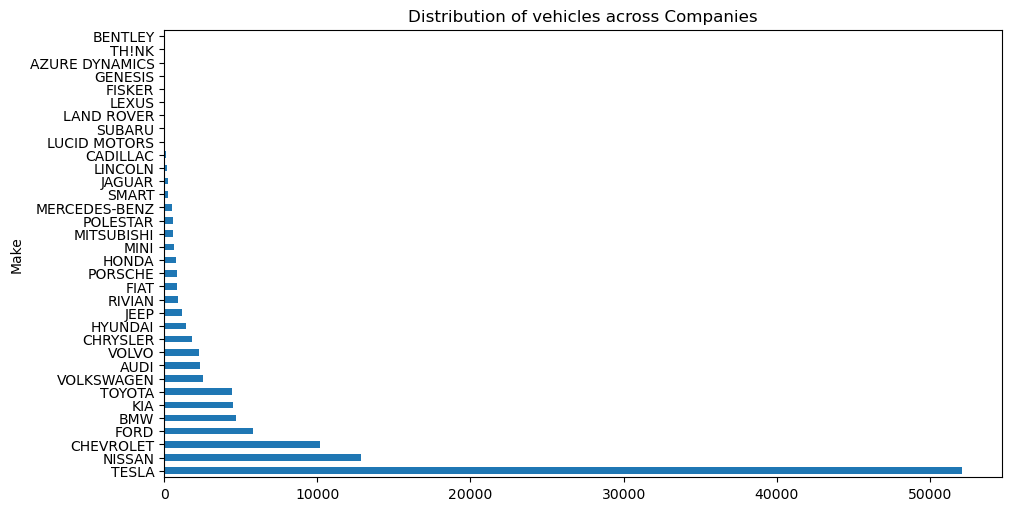

In [17]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Make'].value_counts().plot(kind = 'barh')
plt.title("Distribution of vehicles across Companies")
plt.show() 

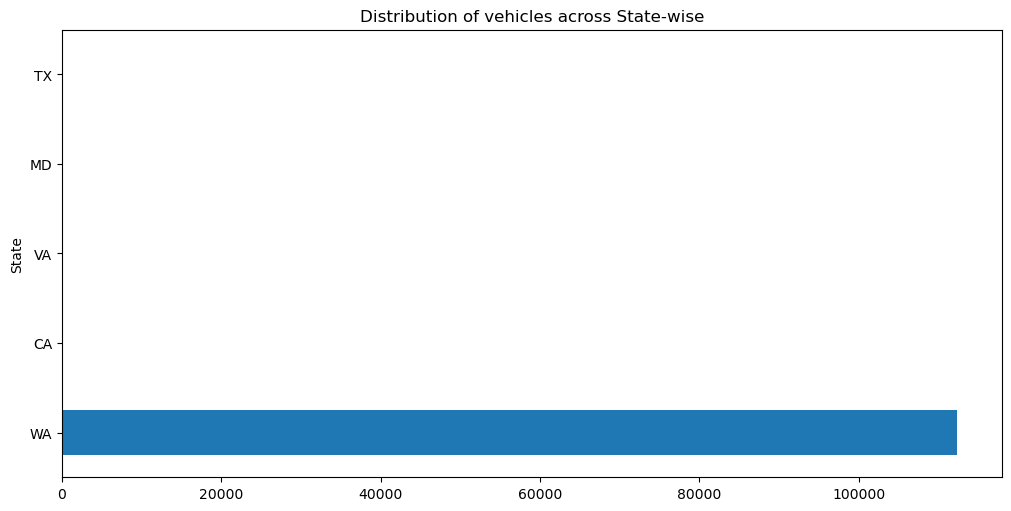

In [18]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['State'].value_counts()[:5].plot(kind = 'barh')
plt.title("Distribution of vehicles across State-wise")
plt.show() 

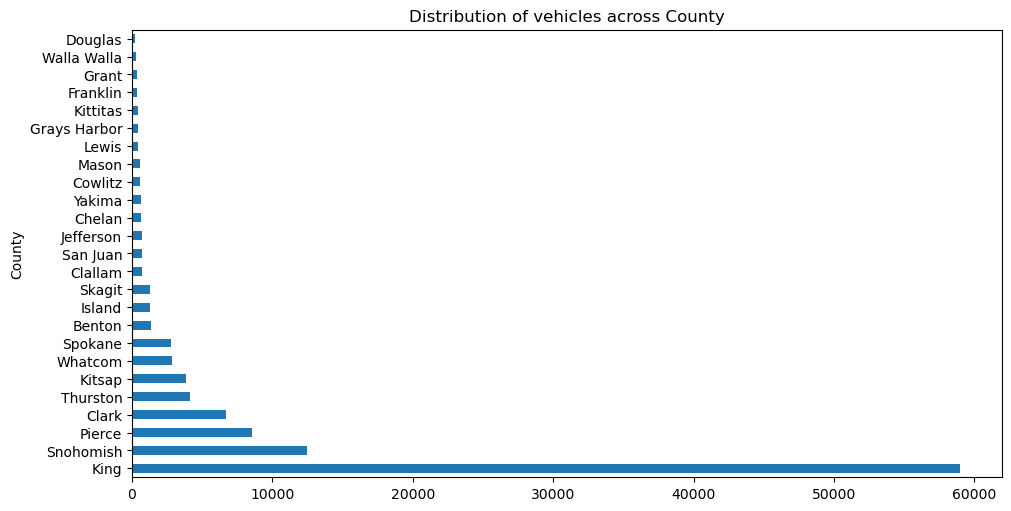

In [19]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['County'].value_counts()[:25].plot(kind = 'barh')
plt.title("Distribution of vehicles across County")
plt.show() 

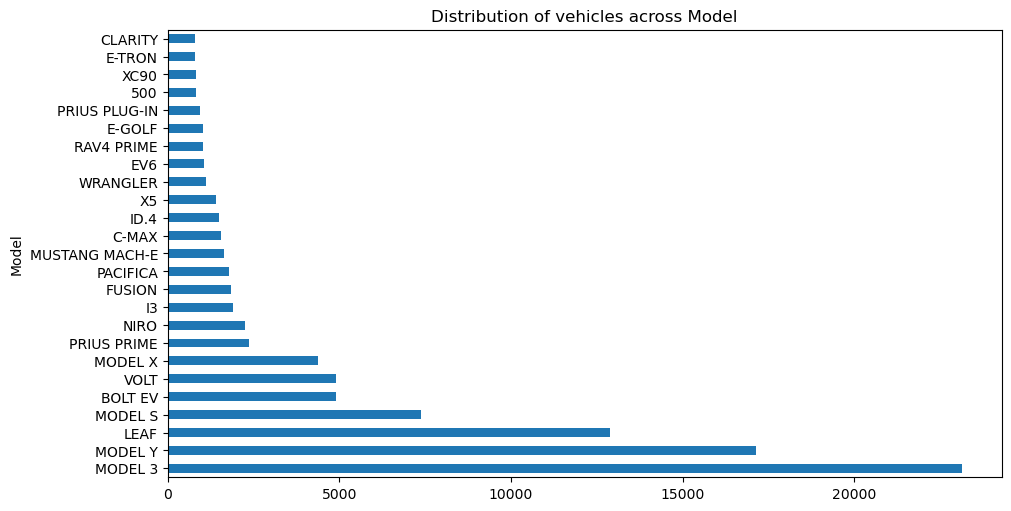

In [20]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Model'].value_counts()[:25].plot(kind = 'barh')
plt.title("Distribution of vehicles across Model")
plt.show() 

In [21]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Electric Vehicle Type'].value_counts().plot(kind = 'barh')
plt.title("Distribution of vehicles across Electric Vehicle Type")
plt.show() 

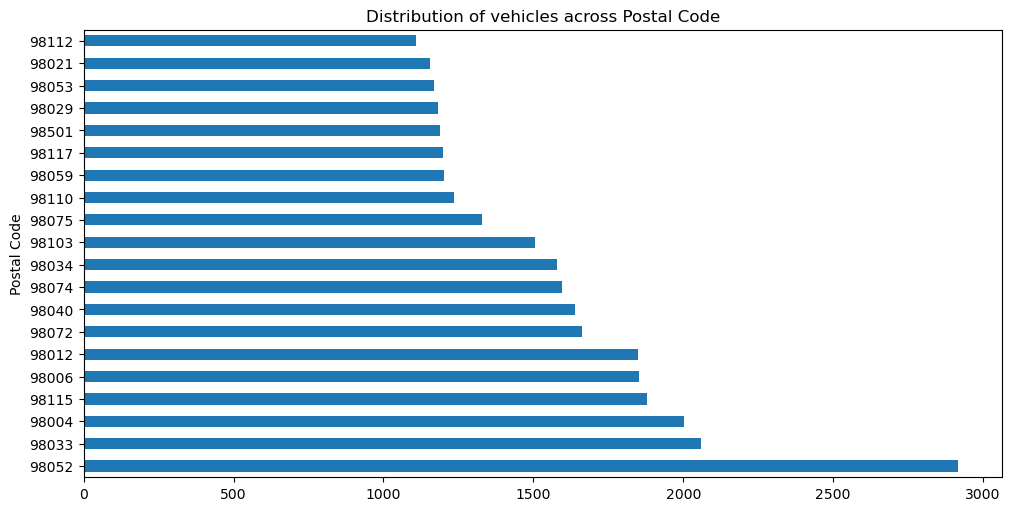

In [22]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Postal Code'].value_counts()[:20].plot(kind = 'barh')
plt.title("Distribution of vehicles across Postal Code")
plt.show() 

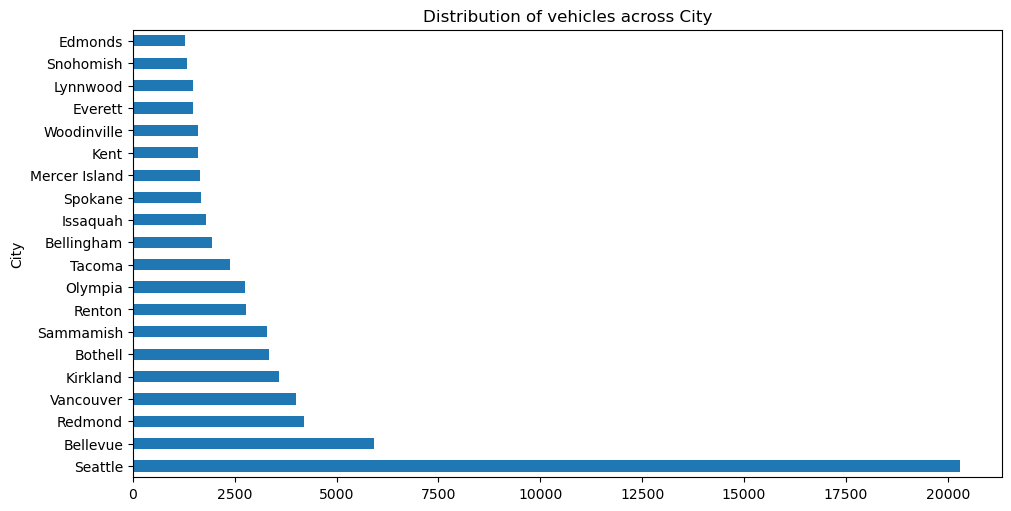

In [23]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['City'].value_counts()[:20].plot(kind = 'barh')
plt.title("Distribution of vehicles across City")
plt.show() 

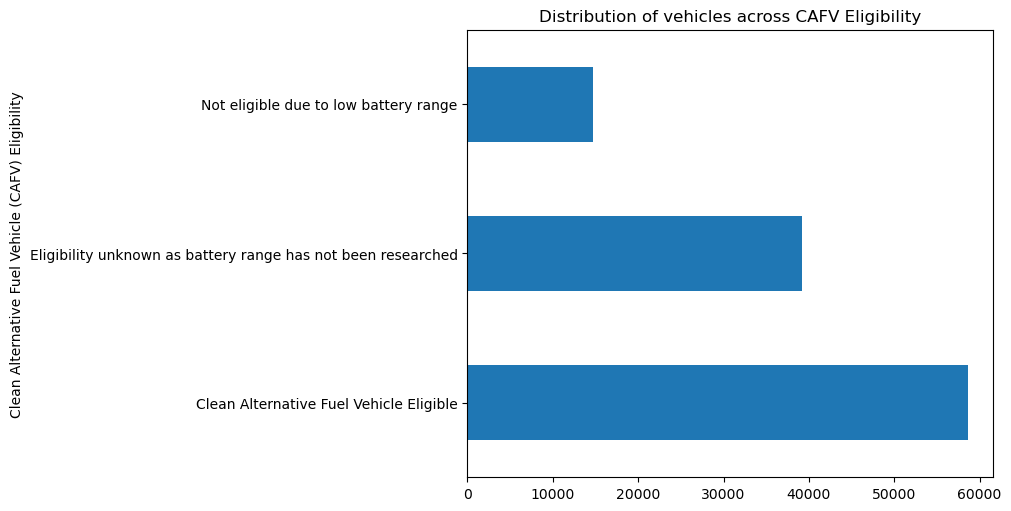

In [24]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind = 'barh')
plt.title("Distribution of vehicles across CAFV Eligibility")
plt.show()

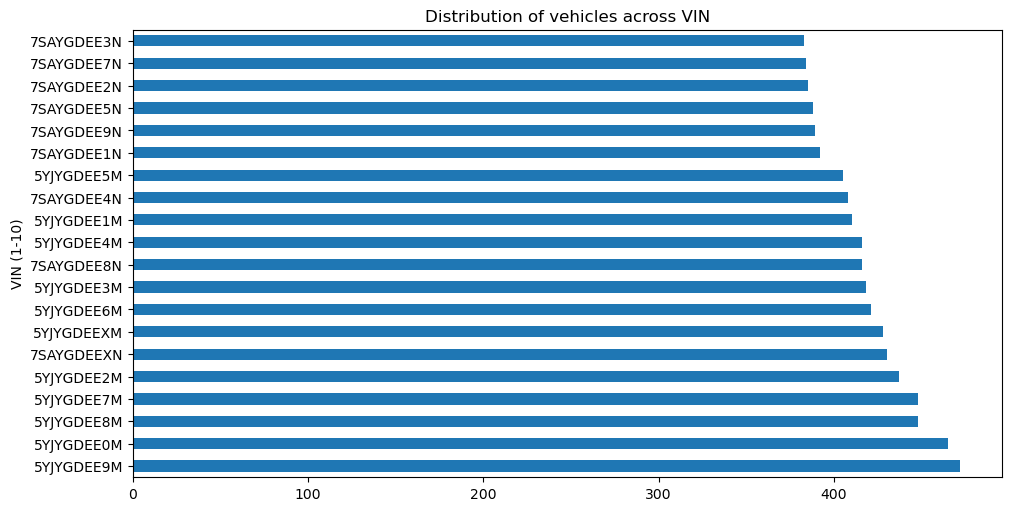

In [25]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['VIN (1-10)'].value_counts()[:20].plot(kind = 'barh')
plt.title("Distribution of vehicles across VIN")
plt.show()

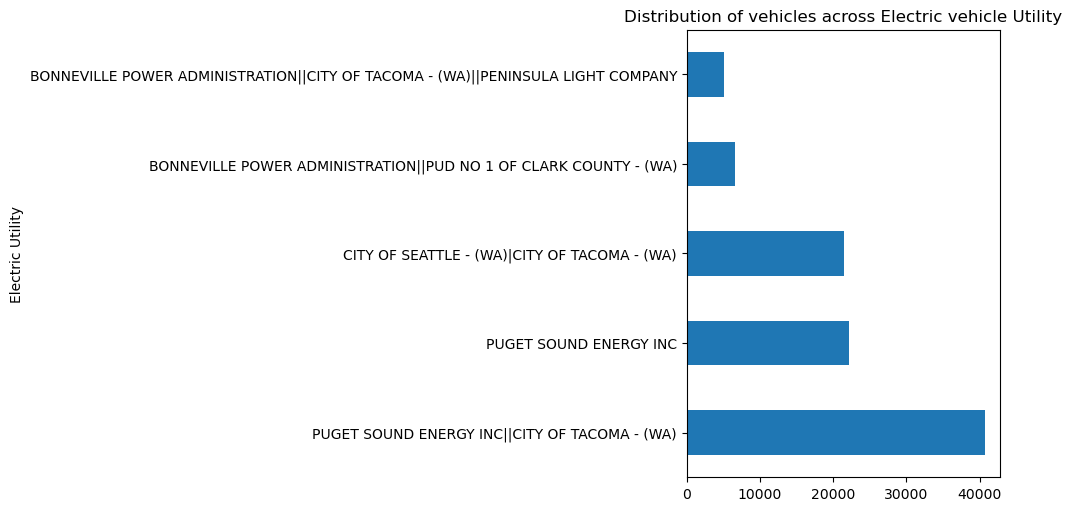

In [26]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Electric Utility'].value_counts()[:5].plot(kind = 'barh')
plt.title("Distribution of vehicles across Electric vehicle Utility")
plt.show()

C:\Users\Bhaskar Matta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhaskar Matta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhaskar Matta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


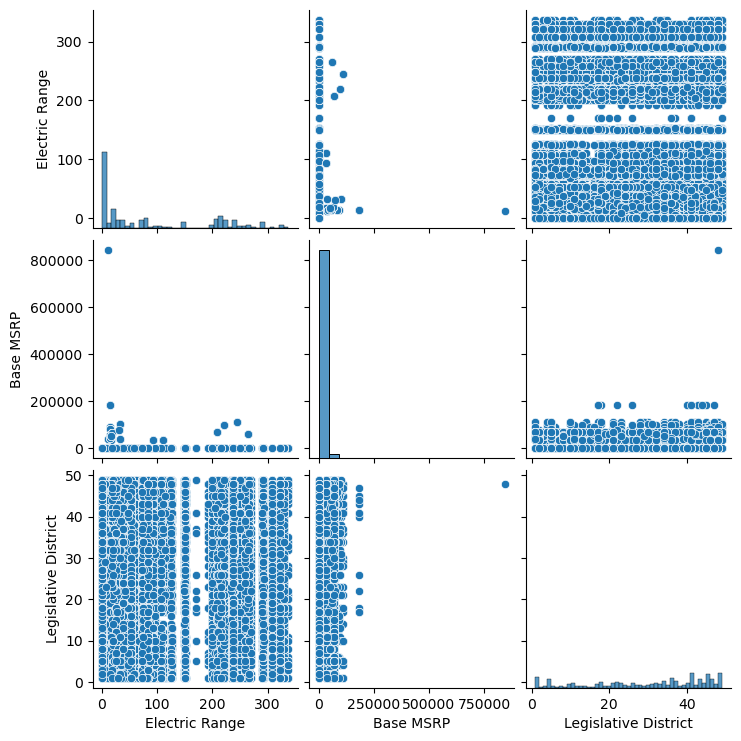

In [27]:
sns.pairplot(df.loc[:, 'Electric Range':'Legislative District']) 

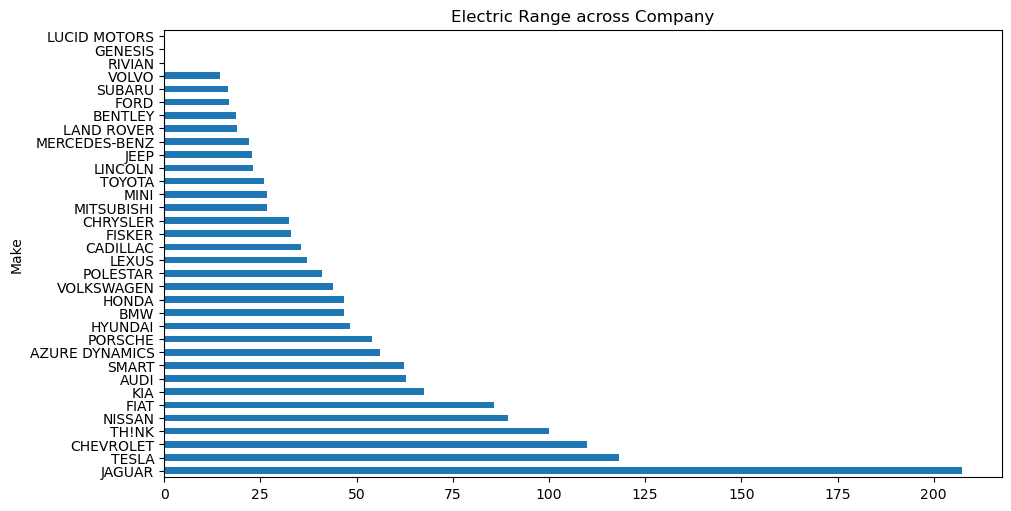

In [28]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df.groupby('Make')['Electric Range'].agg('mean').sort_values(ascending = False).plot(kind = 'barh')
plt.title("Electric Range across Company")
plt.show()

In [29]:
df.groupby('Electric Vehicle Type')['Electric Range'].agg(['min', 'max', 'median', 'mean'])

min  max  median        mean
Electric Vehicle Type                                               
Battery Electric Vehicle (BEV)            0  337    76.0  105.369671
Plug-in Hybrid Electric Vehicle (PHEV)    6  153    25.0   31.000376

<Axes: ylabel='Make'>

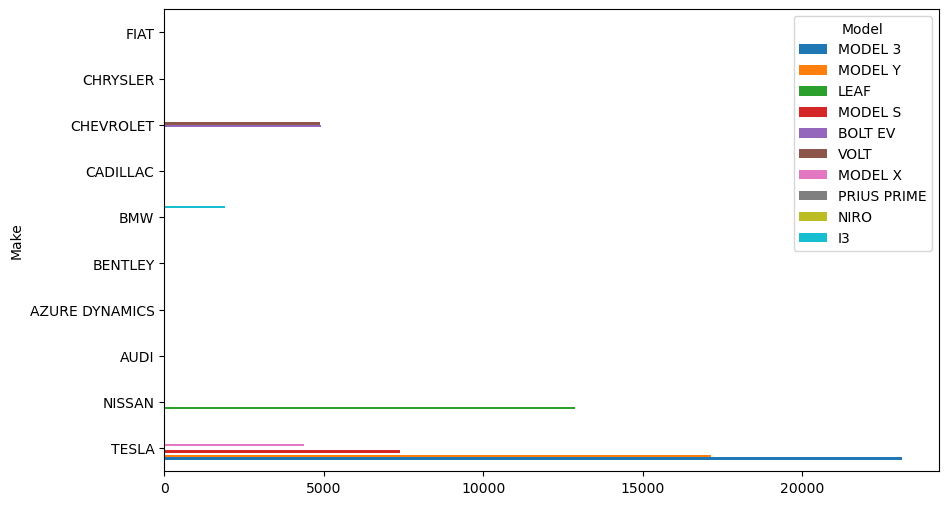

In [30]:
t = pd.crosstab(df['Make'], df['Model'])

top10_models = t.sum().sort_values(ascending=False)[:10].index

t_filtered = t[top10_models].sort_values(by=['MODEL 3', 'MODEL Y', 'LEAF'], ascending=[False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='Make'>

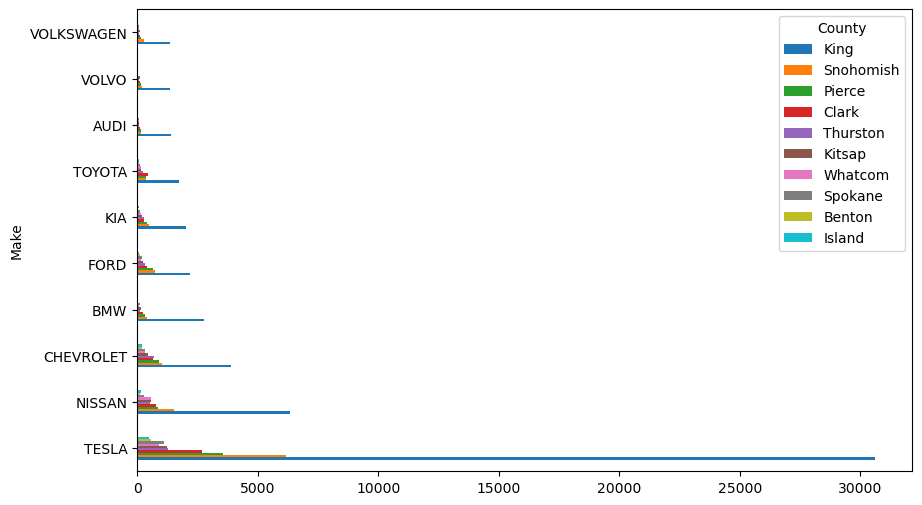

In [31]:
t = pd.crosstab(df['Make'], df['County'])

top10_counties = t.sum().sort_values(ascending=False)[:10].index

t_filtered = t[top10_counties].sort_values(by=['King', 'Snohomish', 'Pierce'], ascending=[False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='Make'>

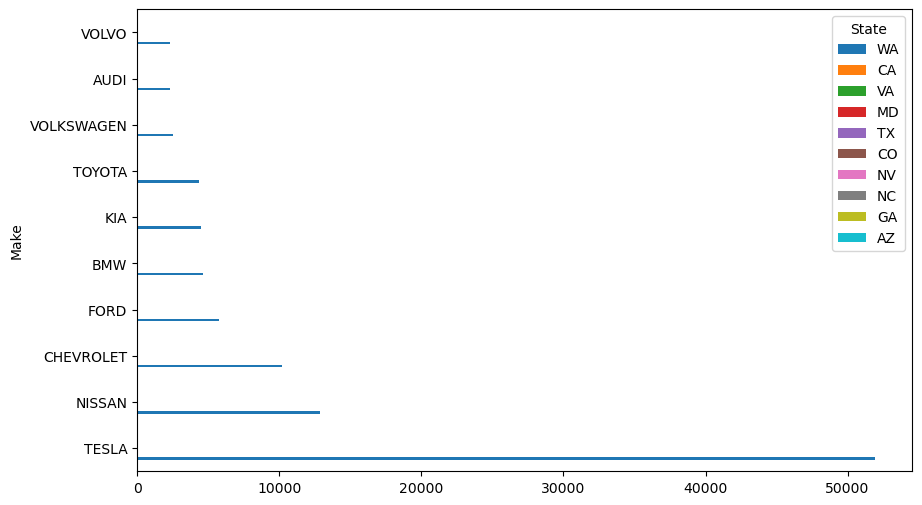

In [32]:
t = pd.crosstab(df['Make'], df['State'])

top10_states = t.sum().sort_values(ascending=False)[:10].index

t_filtered = t[top10_states].sort_values(by=['WA', 'CA', 'VA'], ascending=[False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))

* Most of these cars located in `Washington` state.

In [33]:
states = df['State'].value_counts().reset_index()

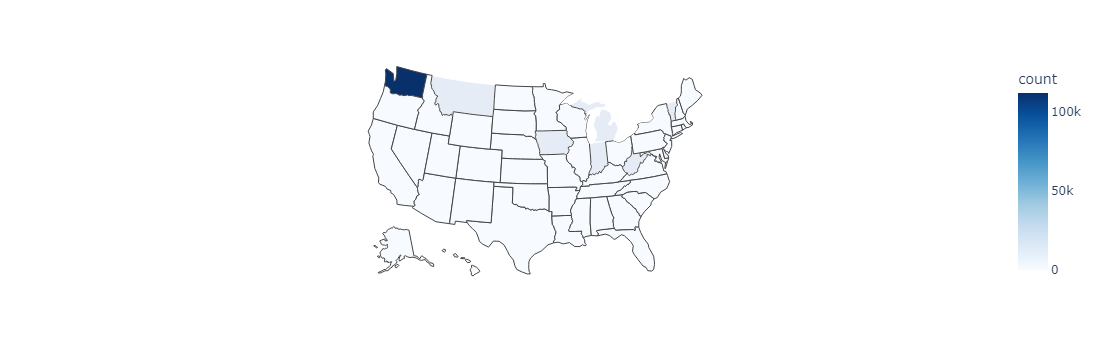

In [34]:
fig = px.choropleth(states,
                    locations='State', 
                    locationmode="USA-states", 
                    color='count',
                    color_continuous_scale= px.colors.sequential.Blues, 
                    scope="usa")

fig.show()

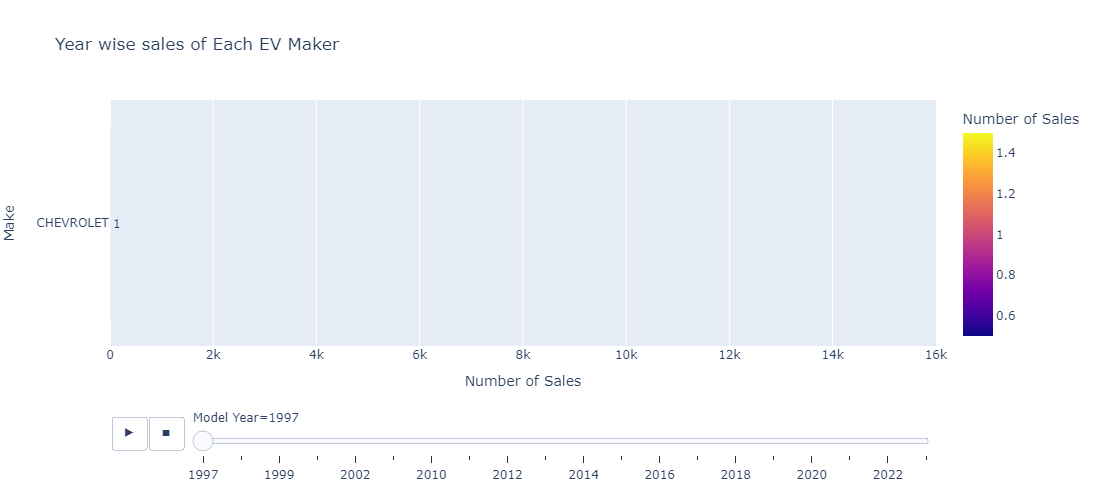

In [35]:
car_counts = df.groupby(['Model Year', 'Make']).size().reset_index(name = 'count')

fig = px.bar(car_counts, x='count', y='Make', color= 'count',text='count',
             animation_frame='Model Year', orientation='h',
             labels={'count': 'Number of Sales', 'year': 'Year'},
             range_x= [0, car_counts['count'].max() * 1.1],
             height= 500,
             title='Year wise sales of Each EV Maker')

fig.show()